<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/230304_DataPreprcessingAndFeatureEngineeringForML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Data import and first glimpse of it

In [2]:
df = pd.read_csv('/content/drive/MyDrive/230222_Master 12 Advanced Projects/Project_08_Materials/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.describe(include = 'O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [10]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

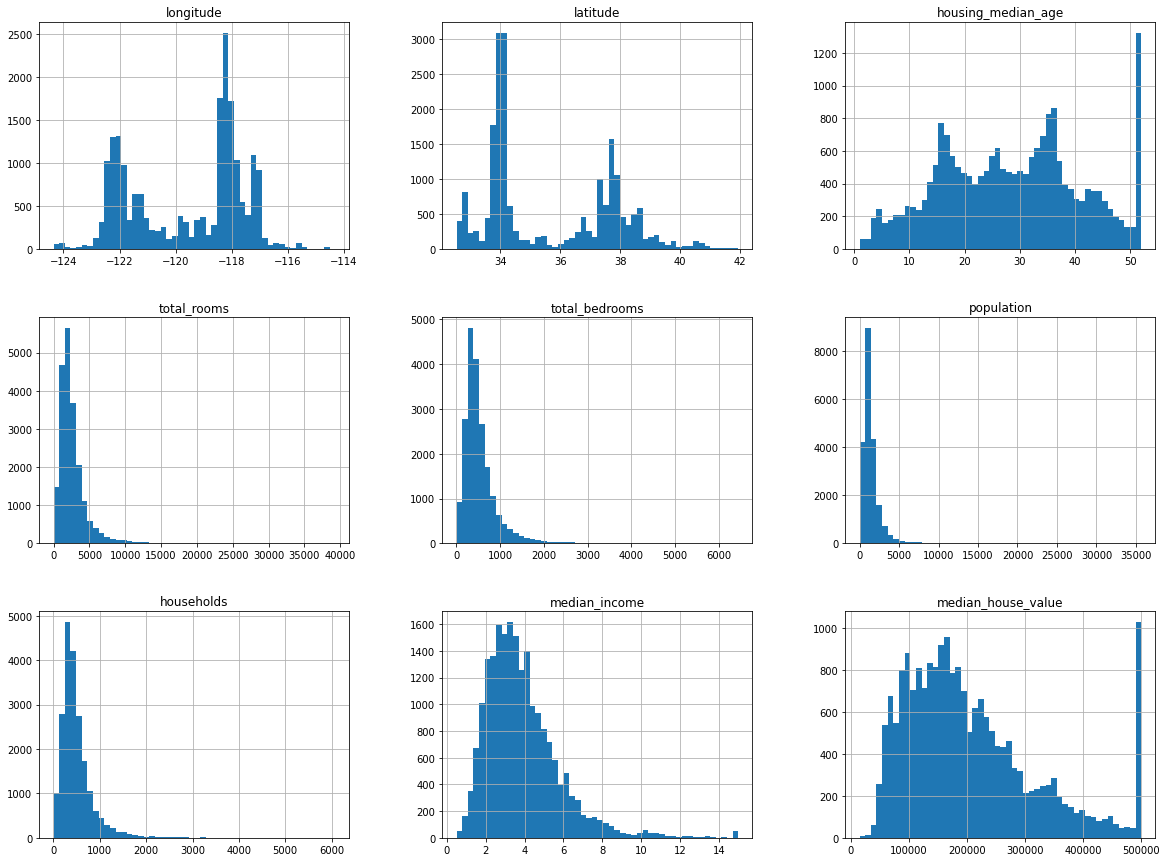

In [12]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

##Data cleaning and creating new features

In [13]:
df.dropna(inplace = True)

In [14]:
df['rooms_per_household'] = df.total_rooms.div(df.households)

###Outlier observations

In [15]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [16]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [17]:
df.loc[[1914, 1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


In [18]:
df['pop_per_household'] = df.population.div(df.households)
df['bedrooms_per_room'] = df.total_bedrooms.div(df.total_rooms)

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


##Which features/factors influence the house price?

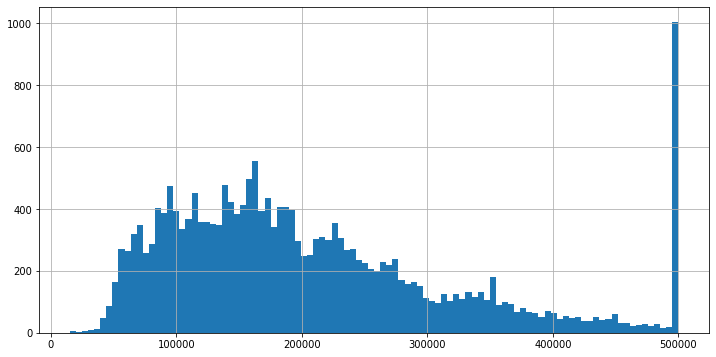

In [20]:
df.median_house_value.hist(bins = 100, figsize = (12, 6))
plt.show()

###Linear relationships between features and the price

In [21]:
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

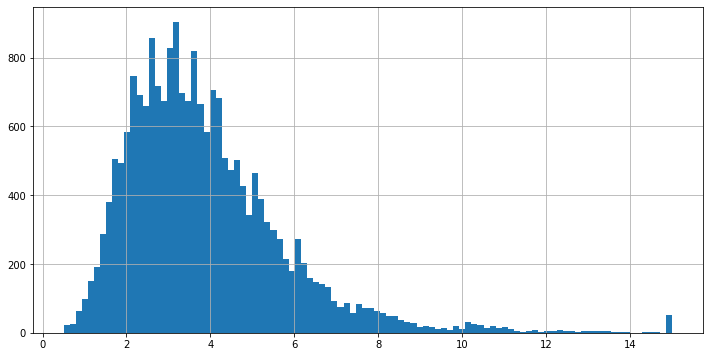

In [22]:
df.median_income.hist(bins = 100, figsize = (12, 6))
plt.show()

###Linear regression line - sns.jointplot()

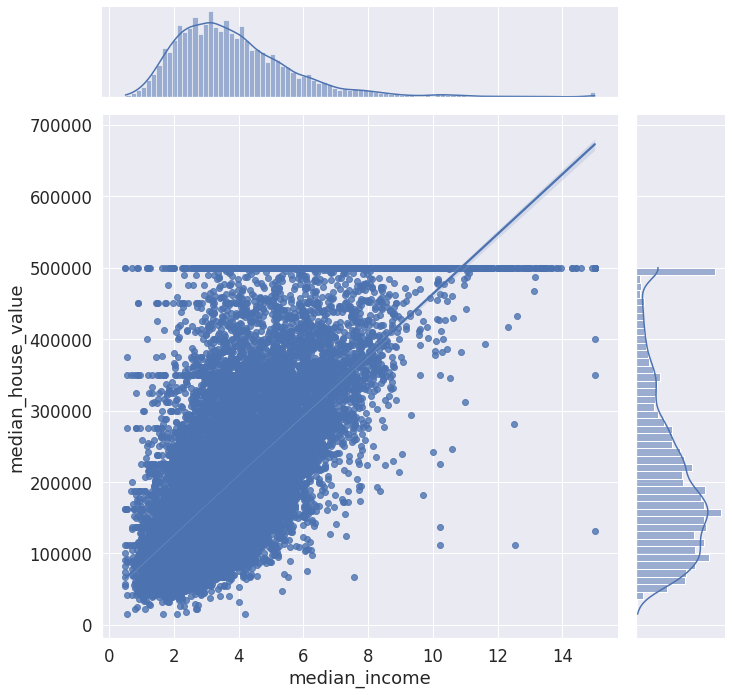

In [23]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'reg', height = 10)
plt.show()

###Kernel dense estimator (KDE)

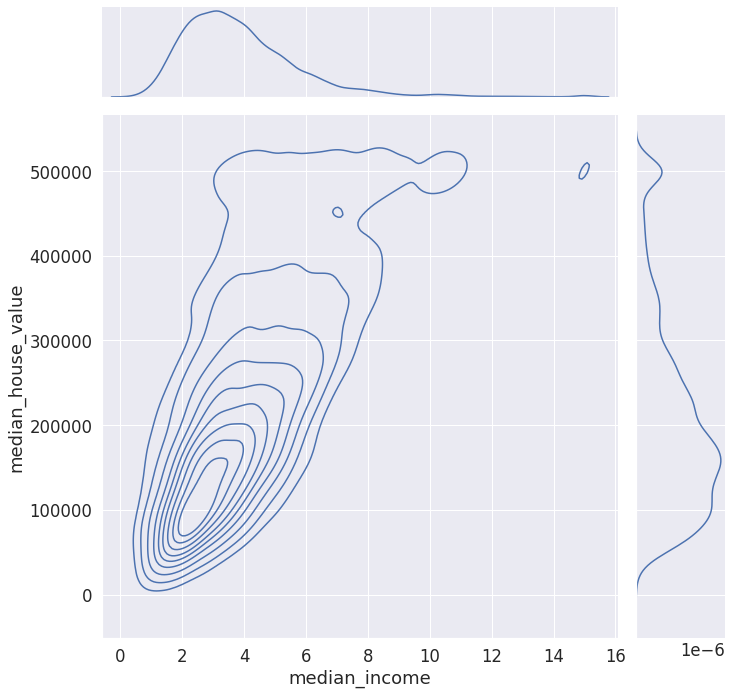

In [24]:
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'kde', height = 10)
plt.show()

##Localization

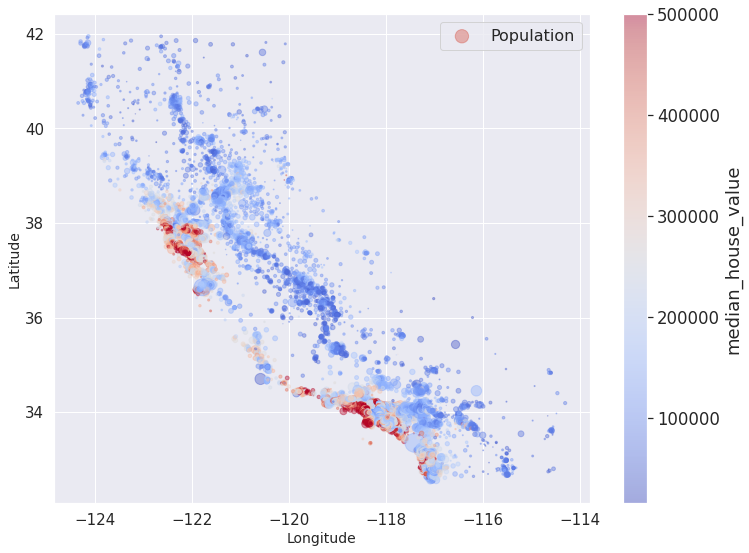

In [27]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
        s = df.population/100, label = 'Population', figsize = (12,9),
        c = 'median_house_value', cmap = 'coolwarm',
        colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude', fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

In [28]:
import matplotlib.image as mpimg
cal_img = mpimg.imread('/content/drive/MyDrive/230222_Master 12 Advanced Projects/Project_08_Materials/california.png')

In [31]:
# cal_img

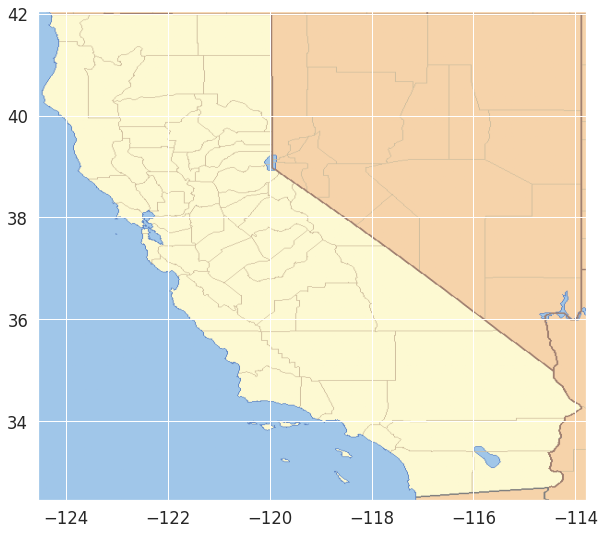

In [33]:
plt.figure(figsize = (12,9))
plt.imshow(cal_img, extent = [-124.55, -113.80, 32.45, 42.05]) #new axis labels
plt.show()

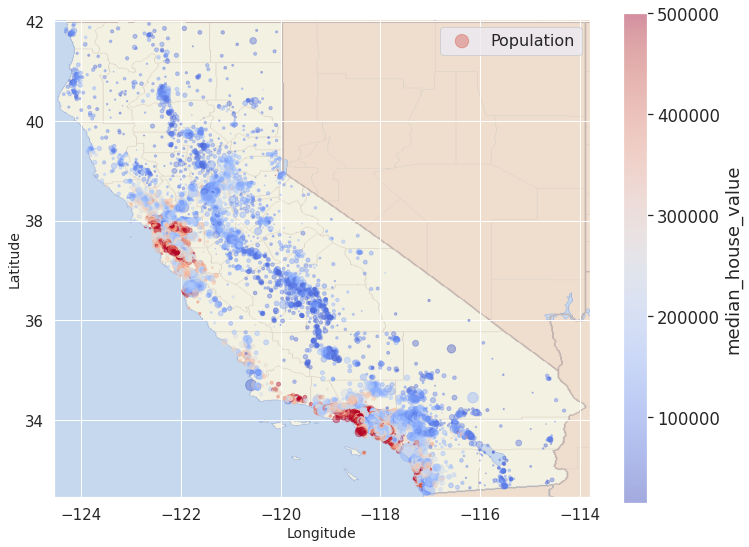

In [34]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
        s = df.population/100, label = 'Population', figsize = (12,9),
        c = 'median_house_value', cmap = 'coolwarm',
        colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.imshow(cal_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet')) #new axis labels
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude', fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

###Near ocean districts

In [36]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [41]:
df_NO = df[df.ocean_proximity == prox[3]].copy()

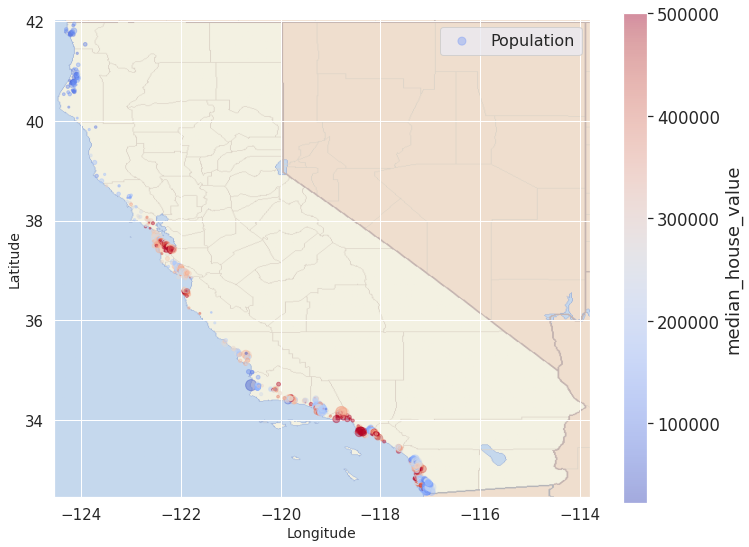

In [42]:
df_NO.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
        s = df_NO.population/100, label = 'Population', figsize = (12,9),
        c = 'median_house_value', cmap = 'coolwarm',
        colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.imshow(cal_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet')) #new axis labels
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude', fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

###Inland

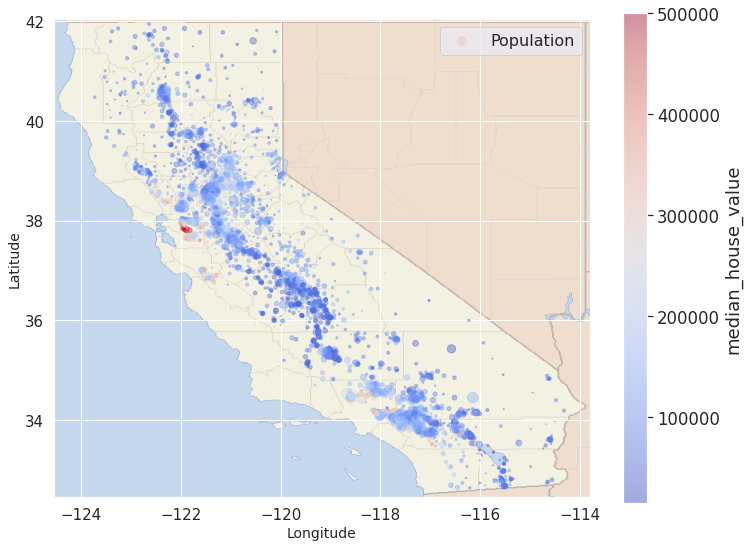

In [43]:
df_IL = df[df.ocean_proximity == prox[2]].copy()
df_IL.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
        s = df_IL.population/100, label = 'Population', figsize = (12,9),
        c = 'median_house_value', cmap = 'coolwarm',
        colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.imshow(cal_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet')) #new axis labels
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude', fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

##Explanatory data analysis

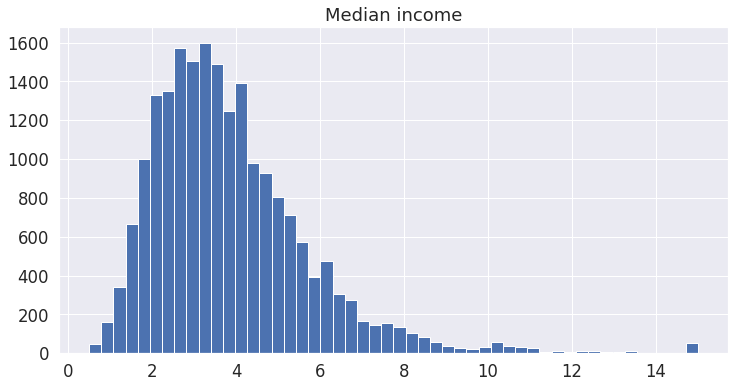

In [44]:
df.median_income.hist(bins = 50, figsize = (12, 6))
plt.title('Median income')
plt.show()

###Binning with the quantile cut - from float to categorical dtype

In [45]:
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] <
                                           (4.744, 7.3] < (7.3, 15.0]]

In [46]:
df['income_cat'] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1], labels = ['Low', 'Below_avg', 'Above_avg', 'High', 'Very_high'])

In [47]:
df.income_cat

0        Very_high
1        Very_high
2             High
3             High
4        Above_avg
           ...    
20635          Low
20636          Low
20637          Low
20638          Low
20639          Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_avg' < 'Above_avg' < 'High' < 'Very_high']

In [48]:
df.income_cat.value_counts(normalize = True)

Low          0.250037
Above_avg    0.250037
Below_avg    0.249988
High         0.199922
Very_high    0.050017
Name: income_cat, dtype: float64

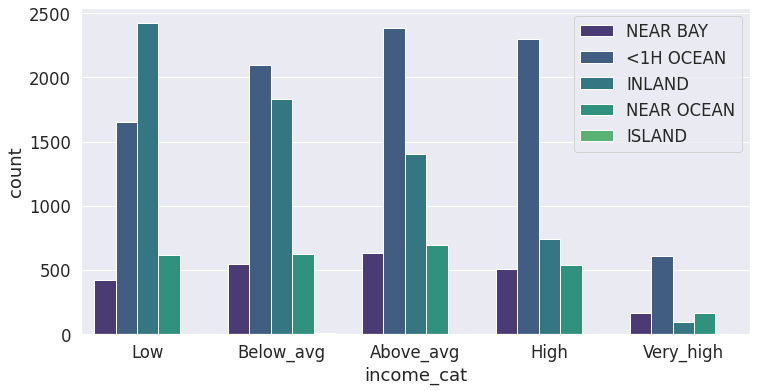

In [49]:
plt.figure(figsize = (12,6))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.countplot(data = df, x = 'income_cat', hue = 'ocean_proximity')
plt.legend(loc = 1)
plt.show()

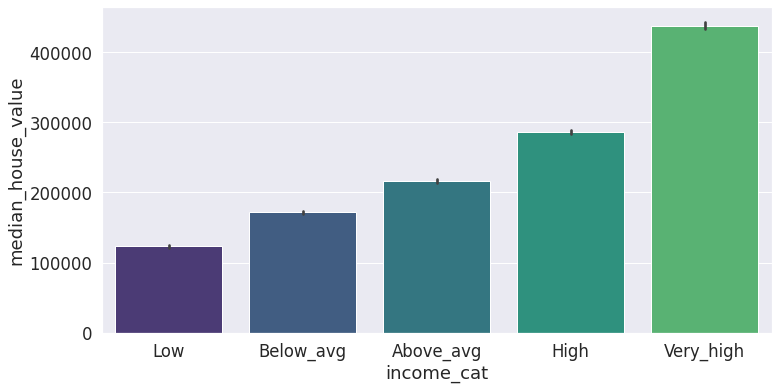

In [52]:
plt.figure(figsize = (12,6))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.barplot(data = df, x = 'income_cat', y = 'median_house_value', dodge = True)
plt.show()

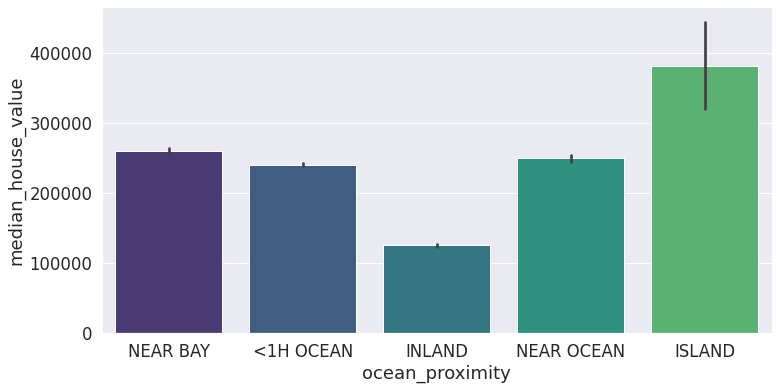

In [53]:
plt.figure(figsize = (12,6))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.barplot(data = df, x = 'ocean_proximity', y = 'median_house_value', dodge = True)
plt.show()

###Heatmap

In [54]:
matrix = df.groupby(['income_cat', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns = 'ISLAND')

In [55]:
matrix.astype('int')

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_avg,197236,115124,220196,208665
Above_avg,232278,147846,261965,255293
High,292208,208095,322566,337446
Very_high,439784,347571,451015,468739


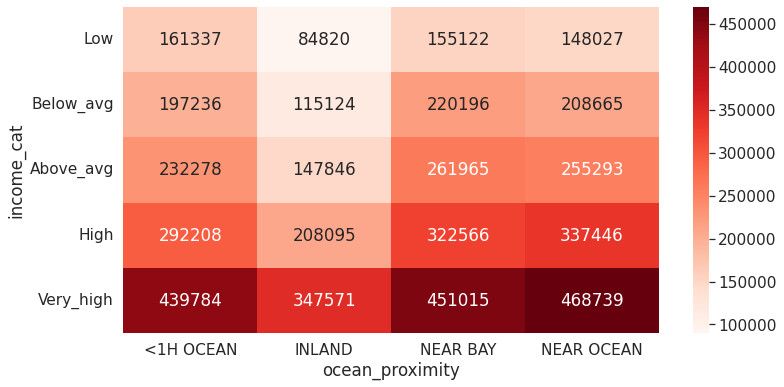

In [56]:
plt.figure(figsize = (12, 6))
sns.set(font_scale = 1.4)
sns.heatmap(matrix.astype('int'), cmap = 'Reds', annot = True, fmt = 'd', vmin = 90000, vmax = 470000)
plt.show()

##Feature engineering

In [57]:
label = df.median_house_value.copy()

In [58]:
features = df.drop(columns = 'median_house_value')

In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20433 non-null  float64 
 1   latitude             20433 non-null  float64 
 2   housing_median_age   20433 non-null  float64 
 3   total_rooms          20433 non-null  float64 
 4   total_bedrooms       20433 non-null  float64 
 5   population           20433 non-null  float64 
 6   households           20433 non-null  float64 
 7   median_income        20433 non-null  float64 
 8   ocean_proximity      20433 non-null  object  
 9   rooms_per_household  20433 non-null  float64 
 10  pop_per_household    20433 non-null  float64 
 11  bedrooms_per_room    20433 non-null  float64 
 12  income_cat           20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.6+ MB


###Standardizing numerical features

In [60]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [61]:
import scipy.stats as stats

The z-score (also called the standard score) gives an idea of how far it is from the mean value of a data point. More technically, it is a measure of how many standard deviations below or above a given population the raw score represents.

In [62]:
feat1 = features.select_dtypes('float').apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


In [63]:
pd.options.display.float_format = '{:.2f}'.format

In [64]:
feat1.agg(['mean', 'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


###One-hot encoding - get_dummies for ocean_proximity feature

In [65]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [66]:
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [67]:
features = pd.concat([feat1, dummies, df.income_cat], axis = 1) #axis = 1 - concatenating horizontally
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_avg


##Train and test set split

In [68]:
test_size = 0.2

In [69]:
X_test = features.sample(frac = test_size, random_state = 123)

In [70]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below_avg
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below_avg
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below_avg
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below_avg
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above_avg
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


###Stratified sampling - test and train sets have the same distribution

In [71]:
X_test.income_cat.value_counts(normalize = True)

Above_avg   0.25
Below_avg   0.25
Low         0.25
High        0.20
Very_high   0.05
Name: income_cat, dtype: float64

In [73]:
features.income_cat.value_counts(normalize = True)

Low         0.25
Above_avg   0.25
Below_avg   0.25
High        0.20
Very_high   0.05
Name: income_cat, dtype: float64

In [74]:
X_test.index

Int64Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550,
            17190,
            ...
             3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826,
            15383],
           dtype='int64', length=4087)

In [75]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [76]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


###Shuffling the train data - df.sample()

In [78]:
X_train = X_train.sample(frac = 1, random_state = 123)

In [ ]:
# from sklearn.utils import shuffle
# df = shuffle(df)

###Dropping the categorical feature

In [79]:
X_train.drop(columns = 'income_cat', inplace = True)
X_test.drop(columns = 'income_cat', inplace = True)

In [80]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

##ML model - random forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500, max_features = 'sqrt', max_depth = 75, min_samples_split = 2)

In [83]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [84]:
forest_reg.score(X_train, y_train)

0.9758470860678036

In [85]:
from sklearn.metrics import mean_squared_error

In [88]:
pred = forest_reg.predict(X_train)

In [89]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18023.671210966968

###Evaluating the model on the test set

In [90]:
forest_reg.score(X_test, y_test)

0.825152593253362

In [91]:
pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47348.34022326726

In [93]:
comp = pd.DataFrame(data = {"True_val": y_test, "Prediction":pred})
comp

,True_val,Prediction
14354,101800.00,224965.81
12908,213000.00,129246.80
19545,58800.00,67903.00
12188,111300.00,187250.02
14786,174100.00,160228.40
...,...,...
10262,272200.00,296562.20
3614,175900.00,183863.20
19296,215900.00,222406.40
5826,326100.00,322985.02


In [94]:
abs_error = comp.True_val.sub(comp.Prediction).abs()
abs_error

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

###Mean absolute error - on average we predict with the difference of 30k between actual value

In [95]:
MAE = abs_error.mean()
MAE

31722.632696354292

##Features importances

In [96]:
forest_reg.feature_importances_

array([8.43251997e-02, 7.63824246e-02, 4.20571593e-02, 2.28712182e-02,
       2.01285036e-02, 2.28577613e-02, 1.96337714e-02, 2.80813190e-01,
       6.50088158e-02, 9.89248218e-02, 9.71199460e-02, 1.91328297e-02,
       1.36700488e-01, 2.65441330e-04, 5.35959721e-03, 8.41883258e-03])

In [97]:
feature_imp = pd.Series(data = forest_reg.feature_importances_, index = X_train.columns).sort_values(ascending = False)

In [101]:
feature_imp

median_income         0.28
INLAND                0.14
pop_per_household     0.10
bedrooms_per_room     0.10
longitude             0.08
latitude              0.08
rooms_per_household   0.07
housing_median_age    0.04
total_rooms           0.02
population            0.02
total_bedrooms        0.02
households            0.02
<1H OCEAN             0.02
NEAR OCEAN            0.01
NEAR BAY              0.01
ISLAND                0.00
dtype: float64

In [102]:
feature_imp.sum()

0.9999999999999999

###Horizontal bar plot

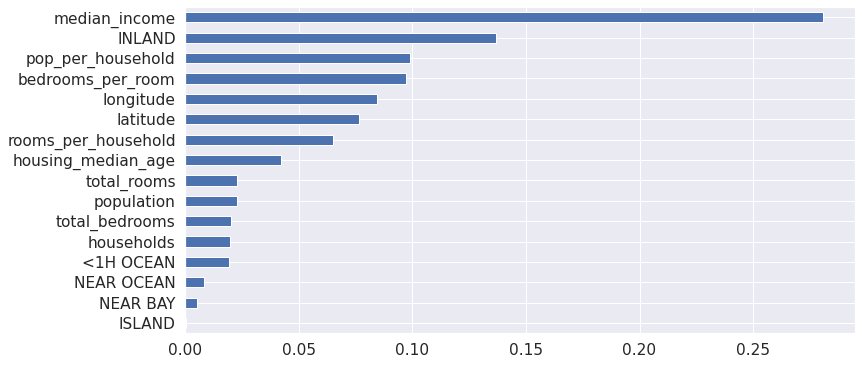

In [99]:
feature_imp.sort_values().plot.barh(figsize = (12, 6))
plt.show()